In [55]:
# https://self-development.info/easyocr%E3%82%92%E3%82%A4%E3%83%B3%E3%82%B9%E3%83%88%E3%83%BC%E3%83%AB%E3%81%97%E3%81%A6python%E3%81%A7%E6%96%87%E5%AD%97%E8%AA%8D%E8%AD%98%E3%82%92%E8%A1%8C%E3%81%86/

In [56]:
# !pip install easyocr

In [57]:
import easyocr
 
image_path = 'data/sample.jpg'
# 言語選択（デフォルトでGPU利用、CPUのみの場合はgpu=False）
reader = easyocr.Reader(['ja','en'], gpu=True)
# 画像読み込み＝文字認識
result = reader.readtext(image_path)#, detail=0)
# print(result)


In [58]:
print(result[:1])

[([[385, 109], [475, 109], [475, 141], [385, 141]], 'Coaking', 0.850903059635093)]


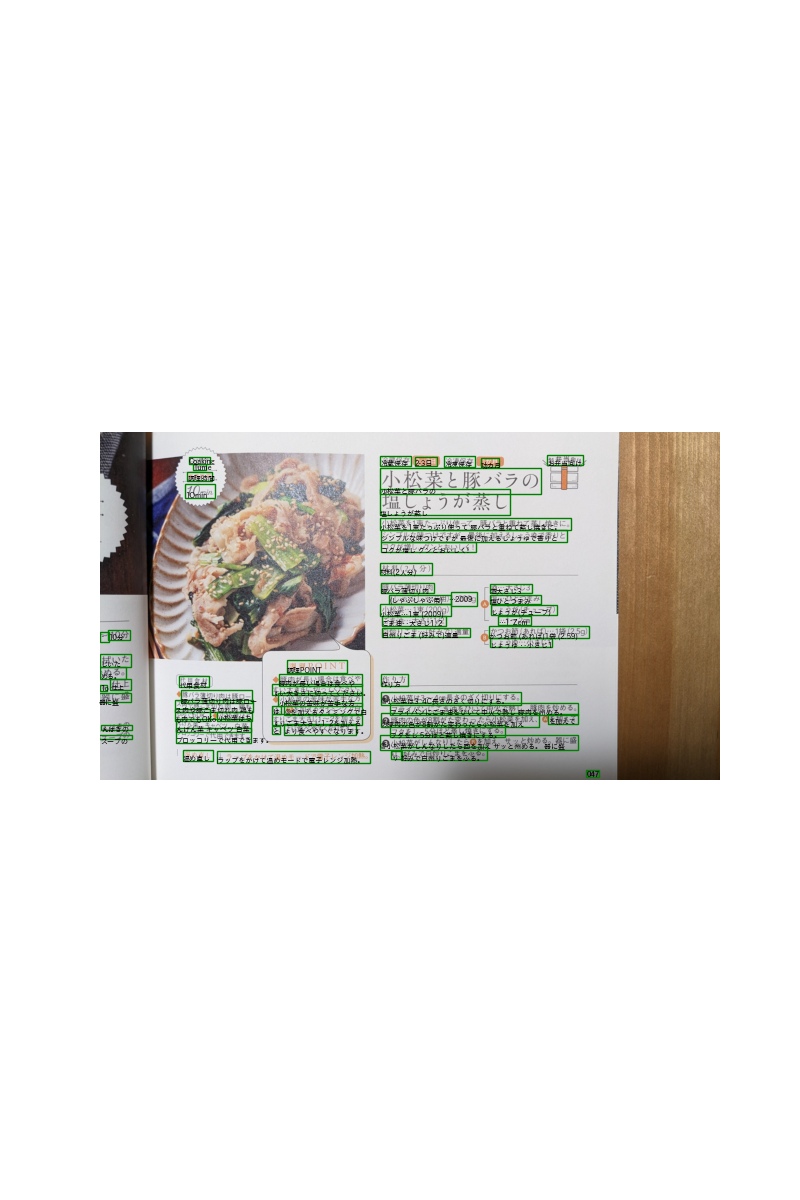

In [59]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches
import japanize_matplotlib
%matplotlib widget

image = Image.open(image_path)

fig = plt.figure(figsize = (8,12))
ax = plt.axes()
ax.imshow(image)
ax.axis("off")
for t in result:
    try:
        bbox = np.array(t[0])
        # print(bbox)
        ax.text(bbox[3,0], bbox[3,1], t[1], size=5,color="black")
        r = patches.Rectangle(
            xy=(bbox[0,0], bbox[0,1]), width=(bbox[2,0] - bbox[0,0]), height=(bbox[2,1] - bbox[0,1]), 
            ec='g', fill=False,linewidth=1.0
        )
        ax.add_patch(r)
    except:
        continue
plt.savefig('data/images/result.png')
plt.show()

In [60]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

def cluster_ocr_results(ocr_results, eps=0.4, min_samples=2):
    # Bounding boxの中心座標とテキスト情報を計算してデータを作成
    centers = []
    texts = []
    confidences = []
    for i, result in enumerate(ocr_results):
        box = result[0]
        center = np.mean(box, axis=0)
        centers.append(center)
        texts.append(result[1])
        confidences.append(result[2])
    X = StandardScaler().fit_transform(centers)

    # DBSCANによるクラスタリング
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    # クラスタリング結果と各クラスタに含まれるテキスト情報の出力
    labels = dbscan.labels_
    print(set(labels))
    clusters = []
    for label, result in zip(labels, ocr_results):
        result_dict = {'box': result[0], 'text': result[1], 'confidence': result[2], 'label': label}
        clusters.append(result_dict)
    return clusters

clustered_result = cluster_ocr_results(result)

{0, 1, 2, 3, 4, -1}


In [61]:
print(clustered_result[0])

{'box': [[385, 109], [475, 109], [475, 141], [385, 141]], 'text': 'Coaking', 'confidence': 0.850903059635093, 'label': 0}


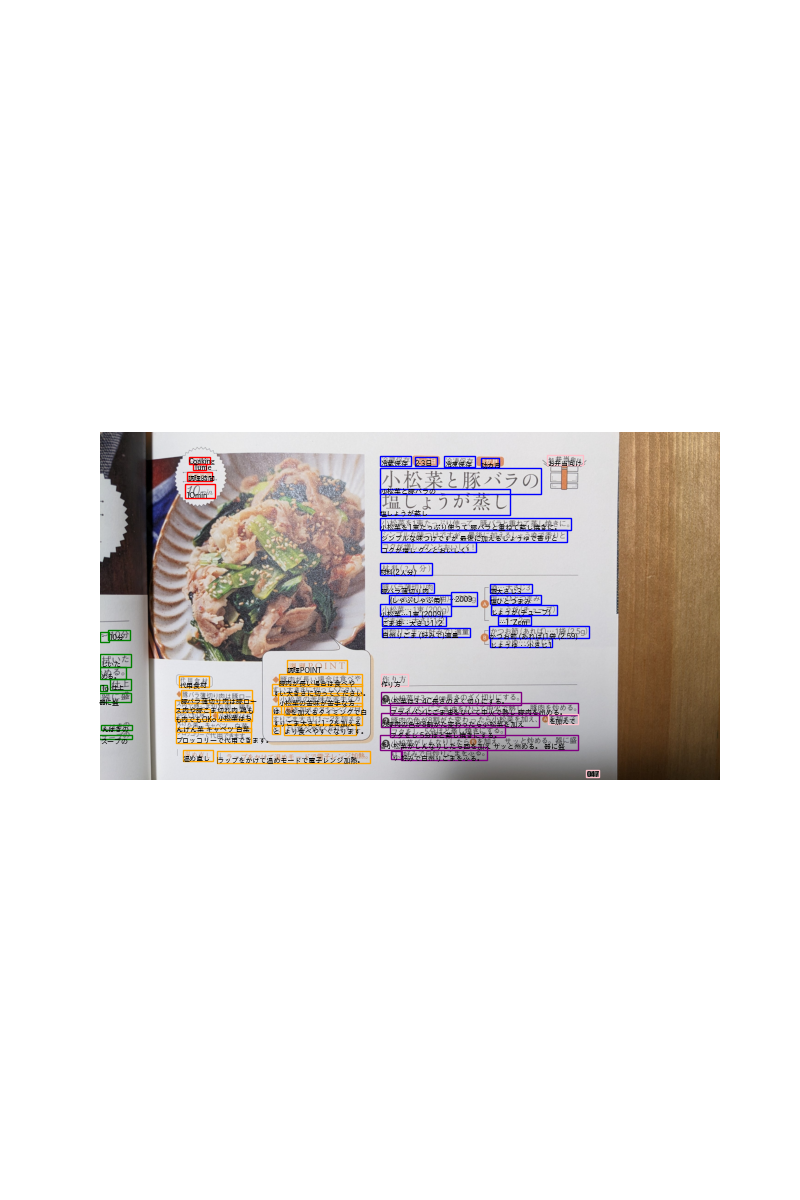

In [62]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink']

image = Image.open(image_path)

fig = plt.figure(figsize = (8,12))
ax = plt.axes()
ax.imshow(image)
ax.axis("off")
for t in clustered_result:
    try:
        bbox = np.array(t['box'])
        # print(bbox)
        ax.text(bbox[3,0], bbox[3,1], t['text'], size=5,color="black")
        r = patches.Rectangle(
            xy=(bbox[0,0], bbox[0,1]), width=(bbox[2,0] - bbox[0,0]), height=(bbox[2,1] - bbox[0,1]), 
            ec=colors[t['label']], fill=False,linewidth=1.0
        )
        ax.add_patch(r)
    except:
        continue
plt.savefig('data/images/clustered_result.png')
plt.show()